In [10]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [125]:
#read the dataset
data = pd.read_csv("Crop_recommendation.csv")

#shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
# lets check the Crops present in this Dataset
# data['label'].value_counts()
data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Descriptive Statistics

In [8]:
# lets check the Summary for all the crops

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

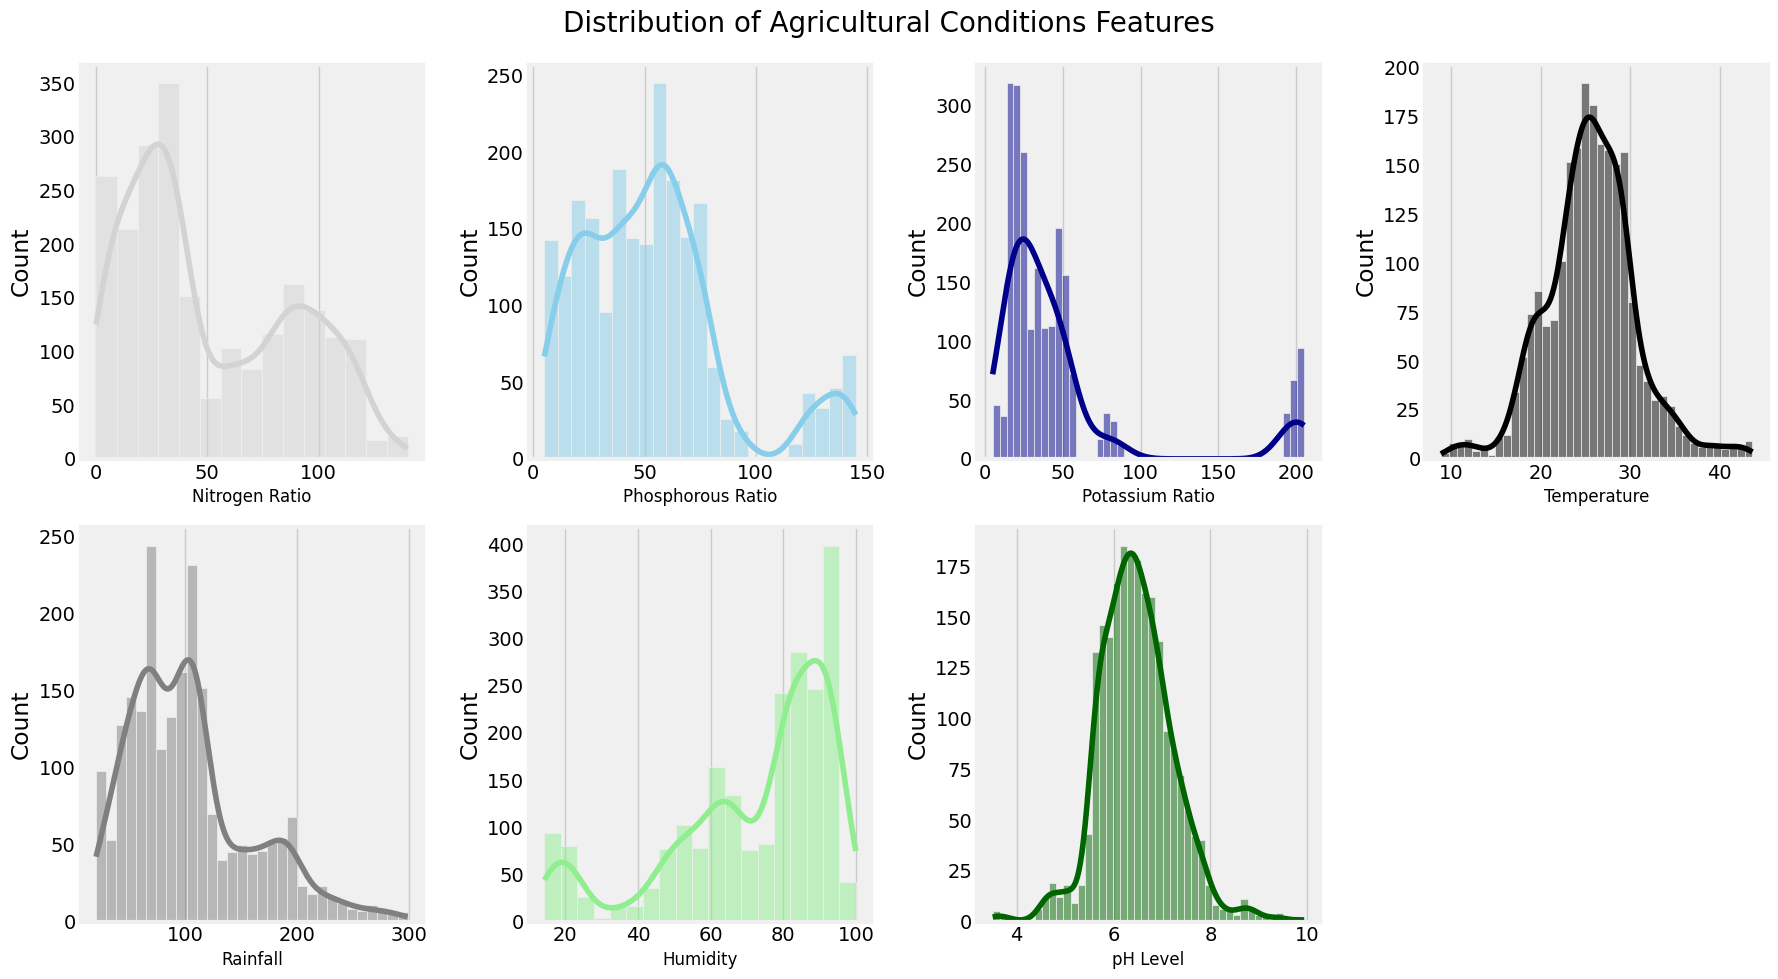

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10),facecolor='white')

plt.subplot(2, 4, 1)
sns.histplot(data['N'], color='lightgrey', kde=True)
plt.xlabel('Nitrogen Ratio', fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 4, 2)
sns.histplot(data['P'], color='skyblue', kde=True)
plt.xlabel('Phosphorous Ratio', fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 4, 3)
sns.histplot(data['K'], color='darkblue', kde=True)
plt.xlabel('Potassium Ratio', fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 4, 4)
sns.histplot(data['temperature'], color='black', kde=True)
plt.xlabel('Temperature', fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 4, 5)
sns.histplot(data['rainfall'], color='grey', kde=True)
plt.xlabel('Rainfall', fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 4, 6)
sns.histplot(data['humidity'], color='lightgreen', kde=True)
plt.xlabel('Humidity', fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 4, 7)
sns.histplot(data['ph'], color='darkgreen', kde=True)
plt.xlabel('pH Level', fontsize=12)
plt.grid(axis='y')

plt.suptitle('Distribution of Agricultural Conditions Features', fontsize=20)
plt.tight_layout()
plt.savefig('distribution.png',bbox_inches='tight',facecolor='white')
plt.show()



E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

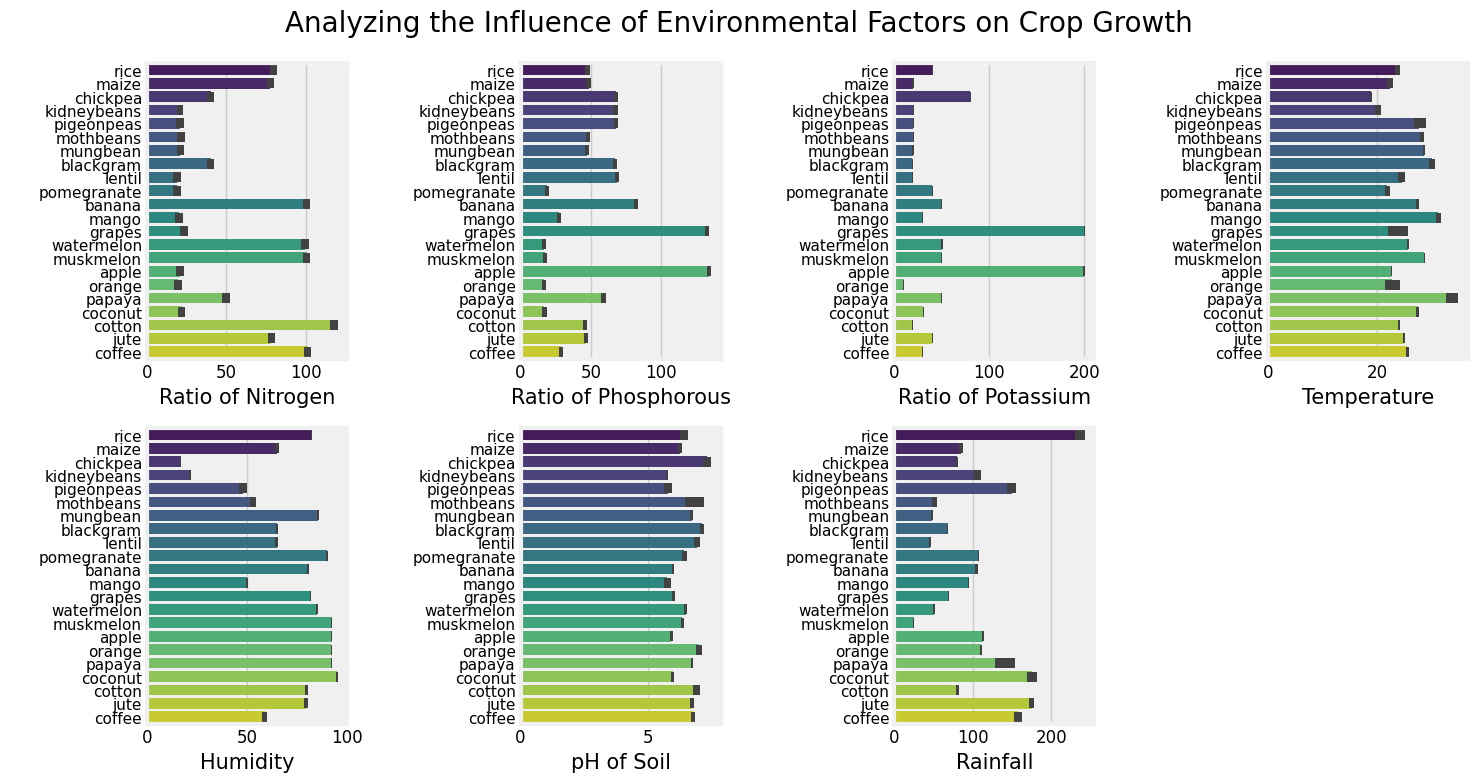

In [39]:

##boxplot of each feature representing the impace on differnt crops
plt.rcParams['figure.figsize'] = (15, 8)
plt.figure(facecolor='white')

plt.subplot(2, 4, 1)
sns.barplot(data=data, x='N', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.subplot(2, 4, 2)
sns.barplot(data=data, x='P', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.subplot(2, 4, 3)
sns.barplot(data=data, x='K', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.subplot(2, 4, 4)
sns.barplot(data=data, x='temperature', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.subplot(2, 4, 5)
sns.barplot(data=data, x='humidity', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.subplot(2, 4, 6)
sns.barplot(data=data, x='ph', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.subplot(2, 4, 7)
sns.barplot(data=data, x='rainfall', y='label', palette='viridis')
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.suptitle('Analyzing the Influence of Environmental Factors on Crop Growth', fontsize=20)
plt.tight_layout()
plt.savefig('influence.png',bbox_inches='tight',facecolor='white')
plt.show()


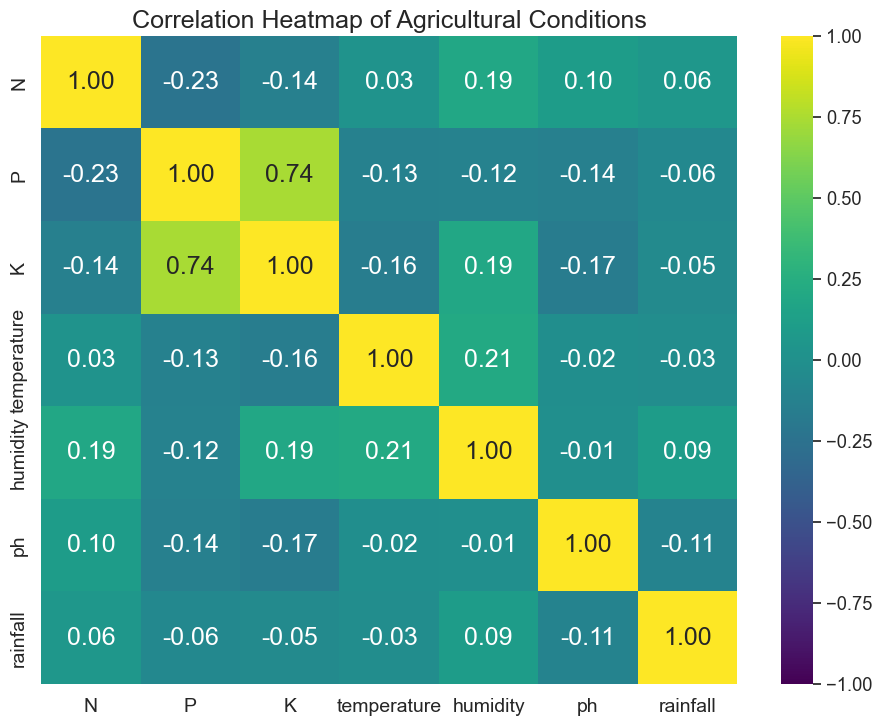

In [53]:
sns.set(font_scale=1.2)

# Calculate the correlation matrix
corr_matrix = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 18})
plt.title('Correlation Heatmap of Agricultural Conditions', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('correlation.png',bbox_inches='tight',facecolor='None')
plt.show()

### Clustering Similar Crops

In [54]:
###Cluster these Crops

import warnings
warnings.filterwarnings('ignore')

x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


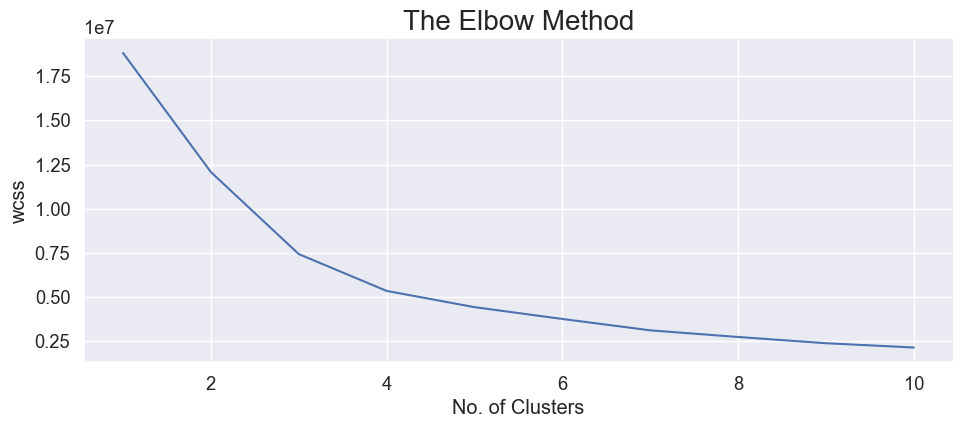

In [57]:
#determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

#plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.savefig('elbow.png',bbox_inches='tight',facecolor='white')
plt.show()

In [124]:
#implement kmean cluster with optimal K neighbors
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#check the Clusters of each Crops

print(z[z['cluster'] == 0]['label'].unique())
print("\n")
print(z[z['cluster'] == 1]['label'].unique())
print("\n")
print(z[z['cluster'] == 2]['label'].unique())
print("\n")
print(z[z['cluster'] == 3]['label'].unique())

['grapes' 'apple']


['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [70]:
data_cluster = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']]
data_cluster = pd.concat([data_cluster,y_means],axis=1)
data_cluster = data_cluster.rename(columns = {0: 'cluster'})
data_cluster

,N,P,K,temperature,ph,humidity,rainfall,cluster
0,90,42,43,20.879744,6.502985,82.002744,202.935536,3
1,85,58,41,21.770462,7.038096,80.319644,226.655537,3
2,60,55,44,23.004459,7.840207,82.320763,263.964248,3
3,74,35,40,26.491096,6.980401,80.158363,242.864034,3
4,78,42,42,20.130175,7.628473,81.604873,262.717340,3
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,6.780064,66.413269,177.774507,3
2196,99,15,27,27.417112,6.086922,56.636362,127.924610,2
2197,118,33,30,24.131797,6.362608,67.225123,173.322839,3
2198,117,32,34,26.272418,6.758793,52.127394,127.175293,2


In [78]:
grouped_kmeans = data_cluster.groupby(['cluster']).mean().round(1)
grouped_kmeans.reset_index(inplace=True)
grouped_kmeans

,cluster,N,P,K,temperature,ph,humidity,rainfall
0,0,22.0,133.4,200.0,23.2,6.0,87.1,91.1
1,1,25.7,48.6,28.8,25.5,6.6,60.8,81.9
2,2,99.9,42.1,39.0,26.0,6.4,80.8,70.9
3,3,61.8,42.0,35.3,26.5,6.4,77.6,190.1


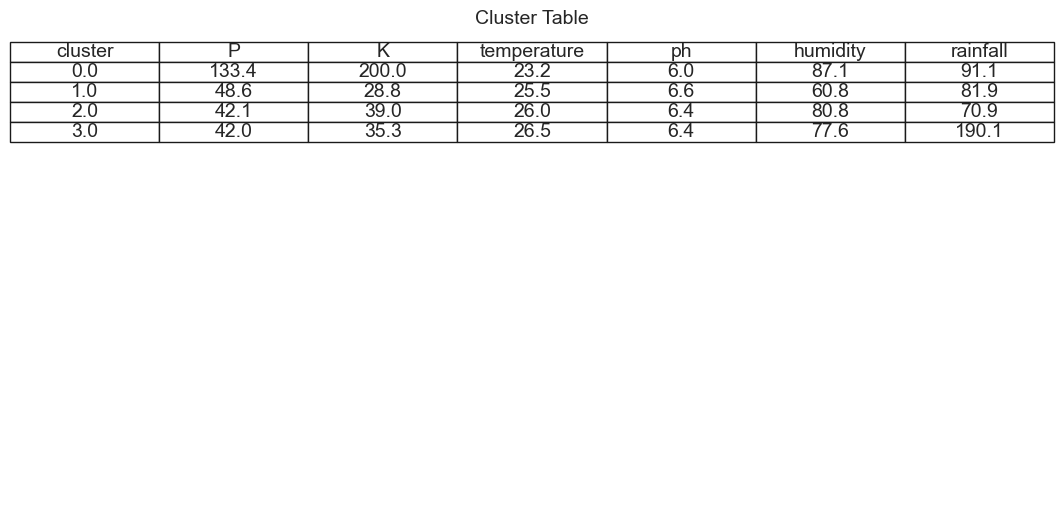

In [77]:
#display cluster means table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

table = ax.table(cellText=grouped_kmeans.values, colLabels=grouped_kmeans.columns, cellLoc='center', loc='upper center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)
plt.title('Cluster Table',fontsize=14)

fig.savefig('table_plot.png', bbox_inches='tight', pad_inches=0.1,facecolor='white')

In [81]:
#split the Dataset for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [82]:
#create Training and Testing Sets for Validation of Results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [116]:
classes = ['apple','banana','blackgram','chickpea','coconut','coffee','cotton','grapes','jute',
           'kidneybeans','lentil','maize','mango','mothbeans','mungbean','muskmelon','orange','papaya','pigeonpeas','pomegranate','rice','watermelon']

In [111]:
from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier()

kn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy is:  0.9772727272727273

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.79      0.90      0.84        21
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.0

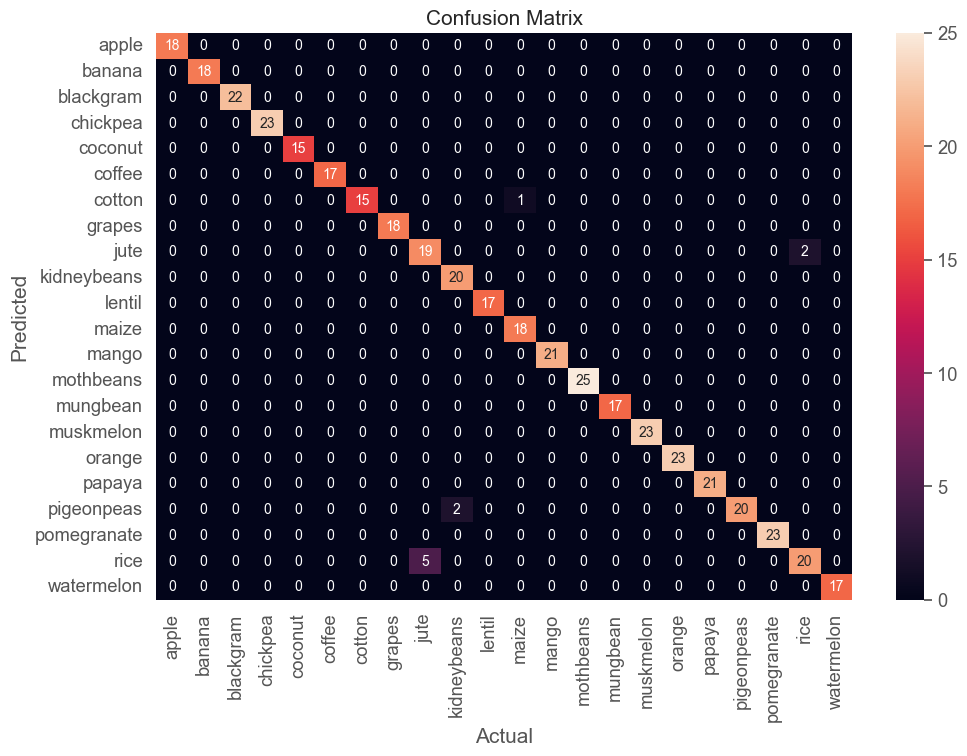


Chi-squared statistic: 8891.727424622162
P-value: 0.0


In [123]:
pred_kn = kn_classifier.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test,y_pred))
print('')
# Classification Report:
print('Classification Report: \n',classification_report(y_test,y_pred))

print('Confusion Matrix: \n\n')
plt.style.use("ggplot")
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=classes,yticklabels=classes)
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.savefig('confusionmatrix.png',bbox_inches='tight',facecolor='white')
plt.show()


chi2, p_value, _, _ = chi2_contingency(cm, correction=False)
print("\nChi-squared statistic:", chi2)
print("P-value:", np.round(p_value,6))